In [33]:
from functions import pre_hmp
import sys
import os
import numpy as np
import mne
import pickle
from config import data_dir
import mne
import hmp
old_adults_ids = np.arange(601, 618)
young_adults_ids = [303, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319]
all_ids = np.concatenate((old_adults_ids, young_adults_ids))

# Recovering subject files paths
subj_files = [os.path.join(data_dir,'prehmp', f'S{id}_epochs_preHMP.fif') for id in young_adults_ids]  # Create a list of files with full paths

In [ ]:

# sfreq = 100 #at what sampling rate we want the data, downsampling to 100Hz is computationally less intensive for hmp instances


# Then we read the data (see more in Tutorial 1)
epoch_data = hmp.io.read_mne_data(subj_files[0:3], sfreq=256, data_format='epochs',
                            lower_limit_rt=0.4, upper_limit_rt=2,
                            rt_col = 'RT_Correct_CorrPU', scale = 1000, #In this case the rts are contained in the dataframe column "RT" and is in milliseconds, thus we adapt
                            verbose=True)#Turning verbose off for the documentation but it is recommended to leave it on as some output from MNE might be useful

c:\Users\gmoha\anaconda3\envs\BCLenv\lib\site-packages\hmp\preprocessing.py:165: UserWarning: Data will be modified inplace, re-read the data or use copy=True if multiplecalls to this function
  warn(
c:\Users\gmoha\anaconda3\envs\BCLenv\lib\site-packages\hmp\preprocessing.py:347: RuntimeWarning: Mean of empty slice
  mean_last_dim = np.nanmean(data.values, axis=-1)


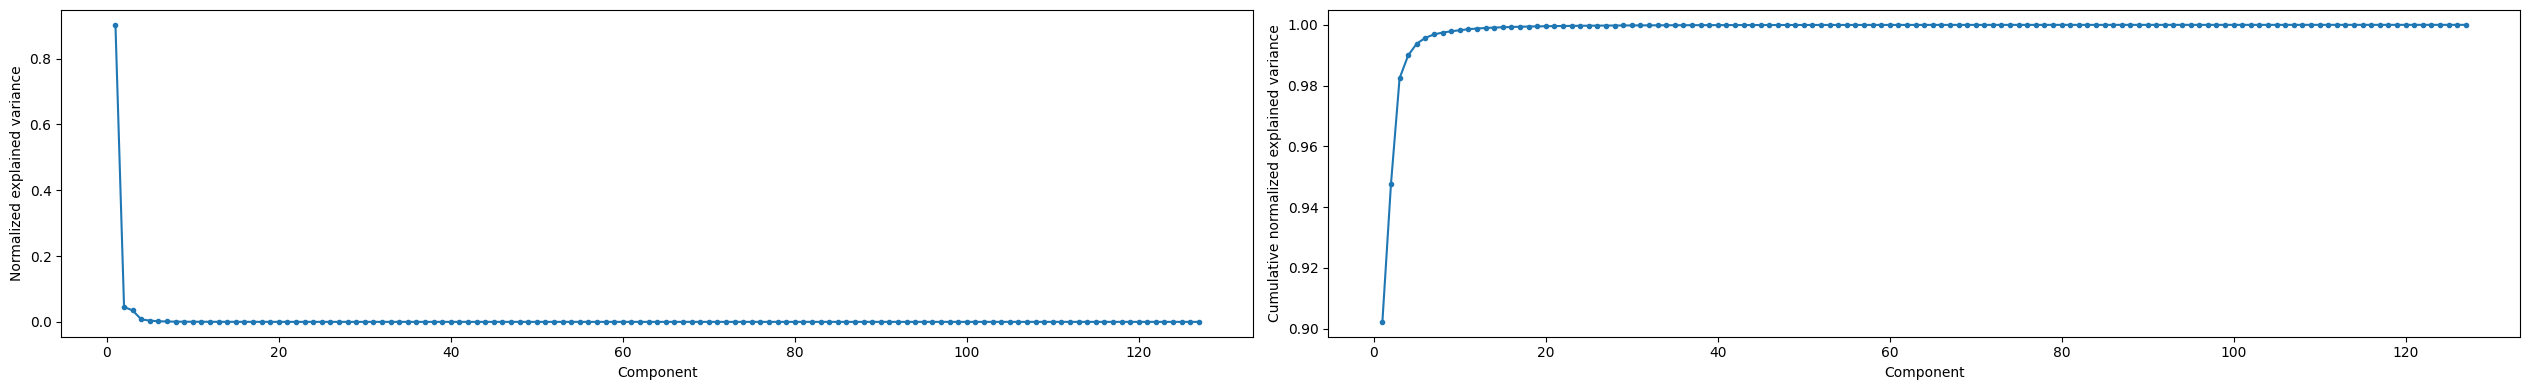

In [4]:
preprocessed = hmp.preprocessing.Standard(epoch_data)

In [5]:
print(preprocessed.data)


<xarray.DataArray (component: 5, all_samples: 15302)> Size: 612kB
array([[ 1.30077725,  0.90656727,  0.47537792, ...,  0.3415999 ,
        -1.89062287, -2.26154597],
       [-1.42660626, -0.77856001, -0.14497736, ..., -0.28276838,
         1.35618238,  1.30373932],
       [-1.59738276, -0.13628654,  0.1769801 , ...,  1.26673426,
         0.58613777, -1.28546416],
       [-0.88912449, -0.06692392,  0.88311666, ...,  0.26299282,
        -0.59183434, -1.06170162],
       [ 0.52629008,  1.0706045 ,  1.31152445, ...,  1.84255143,
         2.17086564,  0.89009584]], shape=(5, 15302))
Coordinates: (12/15)
    Sujet                 (all_samples) object 122kB 'S601' 'S601' ... 'S603'
    Ordre                 (all_samples) float64 122kB 1.0 1.0 ... 108.0 108.0
    Cible                 (all_samples) object 122kB 'crabe' 'crabe' ... 'avion'
    FichierSortie         (all_samples) object 122kB 'Def_Crabe.wav' ... 'Def...
    CheckVocal            (all_samples) object 122kB 'crabe.wav' ... 'avion.

In [6]:
# Defining the expected HMP pattern
event_properties = hmp.patterns.HalfSine.create_expected(sfreq=epoch_data.sfreq)
# Performing the crosscorrelation between the preprocessed data and the expected pattern
trial_data = hmp.trialdata.TrialData.from_preprocessed(preprocessed=preprocessed, pattern=event_properties.template)

In [7]:
model = hmp.models.CumulativeMethod(event_properties)
ll_cumulative, estimates_cumulative = model.fit_transform(trial_data)

  0%|          | 0/86 [00:00<?, ?it/s]

Transition event 1 found around time 360.0
Transition event 2 found around time 760.0

All events found, refitting final combination.
Estimating 2 events model


In [8]:
from mne.io import read_info
info = read_info(subj_files[0], verbose=True)

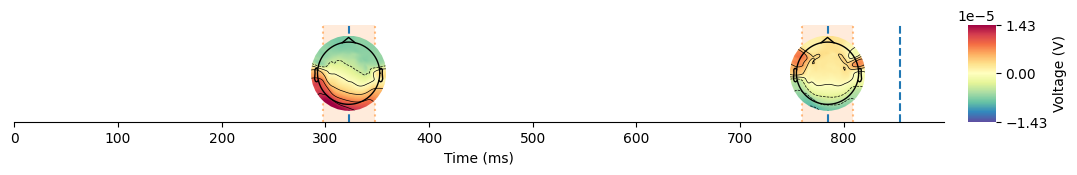

In [9]:
hmp.visu.plot_topo_timecourse(epoch_data, estimates_cumulative, info, as_time=True)

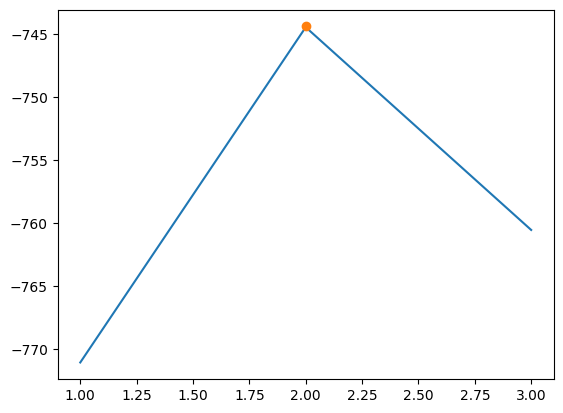

In [10]:
from hmp.visu import plot_topo_timecourse
import numpy as np
import matplotlib.pyplot as plt
model_cumulative = model
cumulative_res = np.array([np.array([model_cumulative.submodels[x].n_events, model_cumulative.submodels[x].lkhs[0]]) for x in model_cumulative.submodels])
plt.plot(cumulative_res[:,0], cumulative_res[:,1])
plt.plot(model_cumulative.final_model.n_events, model_cumulative.final_model.lkhs, 'o', label='Fitted model likelihood')

<Axes: xlabel='Cumulative stage durations from stimulus onset (ms)'>

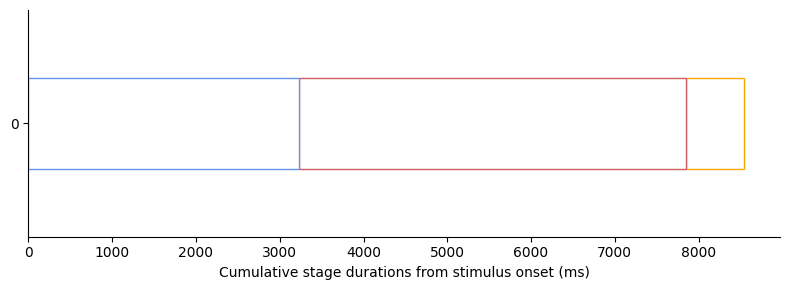

In [11]:
hmp.visu.plot_latencies(estimates_cumulative, epoch_data, as_time=True)

In [13]:
# Compute max likely time for each trial and each event
times =  hmp.utils.event_times(estimates_cumulative, duration=True, add_rt=True, as_time=True)
times

<xarray.DataArray (trial: 177, event: 3)> Size: 4kB
array([[ 870.,   70.,   20.],
       [ 810.,   60.,   20.],
       [  70.,  230.,  140.],
       [  10.,  400.,   30.],
       [ 210.,  120.,  100.],
       [ 110.,  730.,  150.],
       [ 480.,  230.,   50.],
       [ 580.,  270.,   40.],
       [ 470.,  250.,   90.],
       [ 400., 1420.,   20.],
       [ 190.,  360.,   60.],
       [  70.,  820.,   80.],
       [ 150.,  500.,  100.],
       [ 150.,  400.,   20.],
       [ 230.,  420.,   90.],
       [  30.,  440.,  200.],
       [ 250.,  160.,   40.],
       [ 340.,  110.,   40.],
       [ 440.,  170.,   20.],
       [ 420., 1190.,   80.],
...
       [  90.,  550.,   50.],
       [ 350., 1230.,   70.],
       [  60.,  690.,  280.],
       [ 490.,  500.,   20.],
       [ 830.,  320.,   40.],
       [ 150.,  900.,   40.],
       [ 550.,  560.,   20.],
       [ 210.,  610.,   50.],
       [ 470.,  290.,   70.],
       [ 150.,  280.,   60.],
       [ 280.,  430.,   20.],
       [ 420.,  440.,   60.],
       [ 100.,  390.,  210.],
       [ 630.,   90.,   60.],
       [ 360.,  220.,   70.],
       [ 600.,  240.,   30.],
       [ 180.,  910.,   40.],
       [  60.,  710.,  120.],
       [ 480.,  390.,   50.],
       [  70.,  740.,  130.]])
Coordinates:
  * trial        (trial) object 1kB MultiIndex
  * participant  (trial) object 1kB 'S0' 'S0' 'S0' 'S0' ... 'S2' 'S2' 'S2' 'S2'
  * epoch        (trial) int64 1kB 0 1 4 6 7 9 10 ... 96 97 99 102 103 106 107
  * event        (event) int64 24B 0 1 2
    group        (trial) int8 177B 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0

In [16]:
print(by_trial_weights.coords['event'])

<xarray.DataArray 'event' (event: 2)> Size: 16B
array([0, 1])
Coordinates:
  * event    (event) int64 16B 0 1


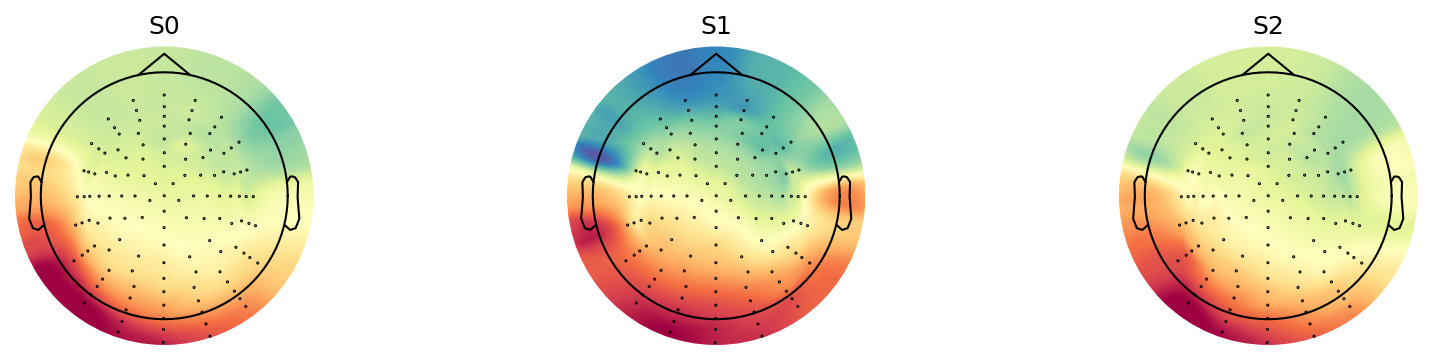

In [25]:
# Plotting individual topographies for a specific event across participants
from mne.viz import plot_topomap

# Get event-channel weights for each trial
by_trial_weights = hmp.utils.event_channels(epoch_data, estimates_cumulative, mean=False)

# Plot topographies for each participant for a selected event
fig, axes = plt.subplots(1, 3, dpi=150, figsize=(12, 2.5))
axes = axes.flatten()
event = 1  # Event index to plot (1-based for display, 0-based for indexing)

for i, participant in enumerate(epoch_data.participant):
    ax = axes[i]
    # Average across epochs for the selected event and participant
    topo = by_trial_weights.sel(event=event-1, participant=participant).mean('epoch')
    plot_topomap(
        topo,
        info,
        sensors=True,
        cmap='Spectral_r',
        res=100,
        show=False,
        axes=ax,
        contours=False
    )
    ax.set_title(f'{str(participant.values)}')

plt.tight_layout()

In [26]:
# Compute max likely time for each trial and each event
times =  hmp.utils.event_times(estimates_cumulative, duration=True, add_rt=True, as_time=True)
times

<xarray.DataArray (trial: 177, event: 3)> Size: 4kB
array([[ 870.,   70.,   20.],
       [ 810.,   60.,   20.],
       [  70.,  230.,  140.],
       [  10.,  400.,   30.],
       [ 210.,  120.,  100.],
       [ 110.,  730.,  150.],
       [ 480.,  230.,   50.],
       [ 580.,  270.,   40.],
       [ 470.,  250.,   90.],
       [ 400., 1420.,   20.],
       [ 190.,  360.,   60.],
       [  70.,  820.,   80.],
       [ 150.,  500.,  100.],
       [ 150.,  400.,   20.],
       [ 230.,  420.,   90.],
       [  30.,  440.,  200.],
       [ 250.,  160.,   40.],
       [ 340.,  110.,   40.],
       [ 440.,  170.,   20.],
       [ 420., 1190.,   80.],
...
       [  90.,  550.,   50.],
       [ 350., 1230.,   70.],
       [  60.,  690.,  280.],
       [ 490.,  500.,   20.],
       [ 830.,  320.,   40.],
       [ 150.,  900.,   40.],
       [ 550.,  560.,   20.],
       [ 210.,  610.,   50.],
       [ 470.,  290.,   70.],
       [ 150.,  280.,   60.],
       [ 280.,  430.,   20.],
       [ 420.,  440.,   60.],
       [ 100.,  390.,  210.],
       [ 630.,   90.,   60.],
       [ 360.,  220.,   70.],
       [ 600.,  240.,   30.],
       [ 180.,  910.,   40.],
       [  60.,  710.,  120.],
       [ 480.,  390.,   50.],
       [  70.,  740.,  130.]])
Coordinates:
  * trial        (trial) object 1kB MultiIndex
  * participant  (trial) object 1kB 'S0' 'S0' 'S0' 'S0' ... 'S2' 'S2' 'S2' 'S2'
  * epoch        (trial) int64 1kB 0 1 4 6 7 9 10 ... 96 97 99 102 103 106 107
  * event        (event) int64 24B 0 1 2
    group        (trial) int8 177B 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0

In [31]:
# Turn into dataframe and recover metadata
times =  hmp.utils.event_times(estimates_cumulative, duration=True, add_rt=True, as_time=True)
times = times.unstack().to_dataframe(name='duration')
times = times[~times.duration.isna()]  #Remove rejected trials
times = times.reset_index().set_index(['participant','epoch'])

# Recover metadata and merge with times
times_metadata = epoch_data.sel(sample=0, channel='A1').to_dataframe().iloc[:,3:]
times_metadata = times_metadata.reset_index().set_index(['participant','epoch'])
times = times.merge(times_metadata, on=['participant','epoch'])

# times

In [ ]:
mean_ac = times[times.cue == 'AC'].groupby(['event']).duration.mean()
mean_sp = times[times.cue == 'SP'].groupby(['event']).duration.mean()

plt.plot(mean_ac.index, mean_ac.values, 'o-', label='AC')
plt.plot(mean_sp.index, mean_sp.values, 'o-', label='SP')
plt.legend()
plt.xlabel('Event')
plt.ylabel('Duration (ms)')
plt.title('Event durations by condition')

In [32]:
times.cue

AttributeError: 'DataFrame' object has no attribute 'cue'